<h1>Analysis of real estate in Saudi Arabia in the first quarter of 2023</h1>

<p>   Today's Saudi Arabian real estate sector marks a significant shift from its traditional oil-driven economy. This dynamic market features a mix of urban developments, luxury residences, and  ambitious projects, reflecting a move towards diversification. Its growth has lessened the dependence on oil, promoting economic stability.

Crucially, real estate is a key contributor to Saudi Arabia's GDP and employment. Its ties with sectors like construction, retail, and hospitality amplify its economic impact. This growth signifies consumer confidence and investment health, positioning the real estate sector as a central player in Saudi Arabia's evolving economic narrative.

In this project, we will ascertain the percentage of real estate transactions in any category, type, and city, and we will examine where the highest and lowest average price per square meter is in Saudi Arabian cities and Riyadh neighborhoods.
</p>


<h1 style="font-color:red">Hello</h1>

In [1]:
# This package is used to correctly reshape Arabic text so that it displays correctly when rendered.
!python -m pip install arabic-reshaper==3.0.0 
# This package is used for handling bidirectional text (like Arabic, which is written from right to left).
!python -m pip install python-bidi==0.4.2

### Import all libraries or tools we need

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm # This import for managing and finding fonts.
from arabic_reshaper import reshape
from bidi.algorithm import get_display
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display

### Import the Excel file.

In [3]:
real_estate_Q1 = pd.read_excel(r"Data Projects/Realestate_2023_Q1.xlsx.XLSX")

### Delete the duplicated columns and start from 1.

In [4]:
# To delete column 0
real_estate_Q1.index = range(1, len(real_estate_Q1) + 1)
# To delete the duplicat columns 
real_estate_Q1.drop_duplicates(inplace=True)
real_estate_Q1.dropna()

,رقم مرجعي,المنطقة,المدينة,الحي,المخطط,رقم القطعة,التاريخ,تصنيف العقار,نوع العقار,عدد العقارات,السعر بالريال السعودي,المساحة,سعر المتر المربع
1,18923186,منطقة الرياض,الافلاج,حي/أخرى,مخطط/أخرى,قطعة 505,1/1/2023,سكني,قطعة أرض,1,32000,630.0,50.7936
2,18920819,منطقة الرياض,الافلاج,حي/الريان,مخطط/872,قطعة 1500,1/1/2023,سكني,قطعة أرض,1,60000,690.0,86.9565
3,18923523,منطقة الرياض,الخرج,حي/827 حى هجرة الصاع,مخطط/أخرى,قطعة 948,1/1/2023,سكني,قطعة أرض,1,20000,630.0,31.7460
4,18909006,منطقة الرياض,الخرج,حي/الاندلس,مخطط/أخرى,قطعة 555,1/1/2023,سكني,قطعة أرض,1,140000,333.0,420.4204
5,18857540,منطقة الرياض,الخرج,حي/الخالديه,مخطط/97,قطعة 182,1/1/2023,سكني,قطعة أرض,1,50000,380.0,131.5789
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44087,19678497,منطقة جازان,جيزان,حي/محليه,مخطط/105,قطعة 631,3/31/2023,سكني,قطعة أرض,1,900000,500.0,1800.0000
44088,19666544,منطقة نجران,نجران,حي/المفرق,مخطط/1245/ 24/ 3/ 1407,قطعة 395,3/31/2023,سكني,قطعة أرض,1,50000,625.0,80.0000
44089,19666048,منطقة نجران,نجران,حي/شمال حى الفهد,مخطط/2/ ن,قطعة 1359,3/31/2023,سكني,قطعة أرض,1,300000,400.0,750.0000
44090,19648639,منطقة نجران,يدمه,حي/6/ ن/ ى/ 1419,مخطط/أخرى,قطعة 220,3/31/2023,سكني,قطعة أرض,1,10000,1600.0,6.2500


### To know all the information about file.

In [5]:
real_estate_Q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44091 entries, 1 to 44091
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   رقم مرجعي              44091 non-null  int64  
 1   المنطقة                44091 non-null  object 
 2   المدينة                44091 non-null  object 
 3   الحي                   44091 non-null  object 
 4   المخطط                 44091 non-null  object 
 5   رقم القطعة             44091 non-null  object 
 6   التاريخ                44091 non-null  object 
 7   تصنيف العقار           44091 non-null  object 
 8   نوع العقار             44091 non-null  object 
 9   عدد العقارات           44091 non-null  int64  
 10  السعر بالريال السعودي  44091 non-null  int64  
 11  المساحة                44091 non-null  float64
 12  سعر المتر المربع       44091 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 4.4+ MB


### Frequency times for each region of Saudi Arabia.

In [6]:
# The number of repetitions of Saudi Arabia’s regions in the file
regions = real_estate_Q1['المنطقة'].value_counts().reset_index()
regions.columns = ['المنطقة', 'عدد التكرار']
regions.index = range(1, len(regions) + 1)
regions

,المنطقة,عدد التكرار
1,منطقة الرياض,14923
2,منطقة مكة المكرمة,8004
3,المنطقة الشرقية,6862
4,منطقة القصيم,4070
5,منطقة المدينة المنورة,2001
6,منطقة حائل,1906
7,منطقة عسير,1902
8,منطقة جازان,993
9,منطقة تبوك,868
10,منطقة الجوف,812


##### We can see in this table that most of the real estate deals that took place were in the Riyadh region.

### Frequency times for each city of Saudi Arabia.

In [7]:
# The number of repetitions of Saudi Arabia’s cities in the file
cities = real_estate_Q1['المدينة'].value_counts().reset_index()
cities.columns = ['المدينة', 'عدد التكرار']
cities.index = range(1, len(cities) + 1)
cities

,المدينة,عدد التكرار
1,الرياض,9765
2,جده,4661
3,بريده,1833
4,مكة المكرمة,1761
5,المدينة المنورة,1626
...,...,...
102,لينه,6
103,جبه,5
104,الصويدره,5
105,ميسان,4


#####  We can see in this table that most of the real estate deals that took place it was in Riyadh, which amounted to 9765.

### Frequency times for each Real estate classification of Saudi Arabia.

In [8]:
real_estate_classification = real_estate_Q1['تصنيف العقار'].value_counts().reset_index()
real_estate_classification.columns = ['تصنيف العقار', 'عدد التكرار']
real_estate_classification.index = range(1, len(real_estate_classification) + 1)
real_estate_classification

,تصنيف العقار,عدد التكرار
1,سكني,31227
2,زراعي,7119
3,تجاري,5671
4,صناعي,74


#####  We can see in this table that most of the real estate deals that took place were residential properties, which amounted to 31227

### Frequency times for each real estate type in Saudi Arabia.

In [9]:
real_estate_type = real_estate_Q1['نوع العقار'].value_counts().reset_index()
real_estate_type.columns = ['نوع العقار', 'عدد التكرار']
real_estate_type.index = range(1, len(real_estate_type) + 1)
real_estate_type

,نوع العقار,عدد التكرار
1,قطعة أرض,34897
2,شقة,7157
3,أرض زراعية,1480
4,بيت,316
5,فيلا,92
6,معرض/محل,82
7,عمارة,28
8,مرفق,19
9,مركز تجاري,11
10,إستراحة,9


##### We note in this table that most of the real estate deals that took place included plots of land, which amounted to 34897

### Frequency rate for each real estate classification

Text(0.5, 1.0, 'ﺭﺎﻘﻋ ﻒﻴﻨﺼﺗ ﻞﻛ ﺔﺒﺴﻧ')

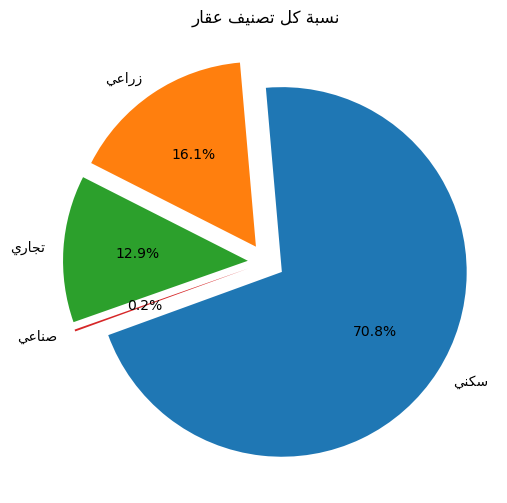

In [10]:
def f(x):
    out=get_display( arabic_reshaper.reshape(x))
    return(out)

explode = (0.1,) * len(real_estate_classification)

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(real_estate_classification['عدد التكرار'], labels=real_estate_classification['تصنيف العقار'].apply(f), autopct='%1.1f%%', startangle=200, explode=explode)
ax.set_title(f('نسبة كل تصنيف عقار'))

##### We can see in this graph that "Residential" accounts for 70.8% of the deal rates in the first quarter of 2023.

### We collect all variables with low repeat numbers. 

In [11]:
real_estate_type_other = real_estate_type[real_estate_type['نوع العقار'].isin(['بيت', 'فيلا', 'معرض/محل', 'عمارة', 'مرفق', 'مركز تجاري', 'إستراحة'])]['عدد التكرار'].sum()

# Aggregating other types
real_estate_type_other_1 = {
    'نوع العقار': ['قطعة أرض', 'شقة', 'أرض زراعية', 'اخرى'],
    'عدد التكرار': [
        real_estate_type[real_estate_type['نوع العقار'] == 'قطعة أرض']['عدد التكرار'].sum(),
        real_estate_type[real_estate_type['نوع العقار'] == 'شقة']['عدد التكرار'].sum(),
        real_estate_type[real_estate_type['نوع العقار'] == 'أرض زراعية']['عدد التكرار'].sum(),
        real_estate_type_other
    ]
}
real_estate_type_other_plt = pd.DataFrame(real_estate_type_other_1)
real_estate_type_other_plt

,نوع العقار,عدد التكرار
0,قطعة أرض,34897
1,شقة,7157
2,أرض زراعية,1480
3,اخرى,557


##### We collected (House, Villa, Showroom/Shop, Building, Facility, Commercial Centre, and Rest House) in a variable and we named it (other)

### Frequency rate for each real estate type

Text(0.5, 1.0, 'ﺭﺎﻘﻌﻟﺍ ﻉﻮﻧ ﻞﻛ ﺔﺒﺴﻧ')

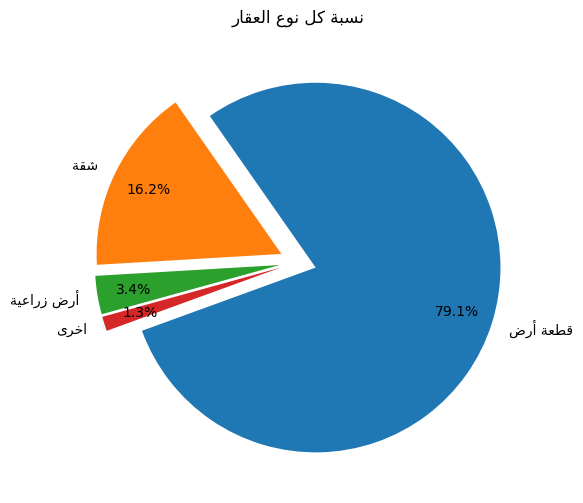

In [12]:
explode = (0.1,) * len(real_estate_type_other_plt)

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(real_estate_type_other_plt['عدد التكرار'], labels=real_estate_type_other_plt['نوع العقار'].apply(f), autopct='%1.1f%%', startangle=200, pctdistance=0.8, explode=explode)
ax.set_title(f('نسبة كل نوع العقار'))

##### We can see in this graph that "pieceland" accounts for 79.1% of the deal rates in the first quarter of 2023.

### Filter the file for "Residential" property  classification and property type "pieceland"

In [13]:
pieceland = real_estate_Q1[(real_estate_Q1['تصنيف العقار'] == 'سكني') & (real_estate_Q1['نوع العقار'] == 'قطعة أرض')]

### Calculating the average price per square meter for a pieceland in top 5 cities and bottom 5 cities

In [14]:
avg_pieceland = pieceland.groupby('المدينة')['سعر المتر المربع'].mean()

# Top 5 cities
top_5_avg_pieceland = avg_pieceland.sort_values(ascending=False).head(5)
# Bottom 5 cities
bottom_5_avg_pieceland = avg_pieceland.sort_values(ascending=True).head(5)

top_5_avg_pieceland_df = top_5_avg_pieceland.reset_index()
top_5_avg_pieceland_df.columns = ['المدينة', 'متوسط سعر المتر المربع']

bottom_5_avg_pieceland_df = bottom_5_avg_pieceland.reset_index()
bottom_5_avg_pieceland_df.columns = ['المدينة', 'متوسط سعر المتر المربع']

### Create the new table for the top 5 cities for the average Price per square meter of a piece of land.

In [15]:
mydata_top_5_avg_pieceland= top_5_avg_pieceland_df.sort_values(by='متوسط سعر المتر المربع', ascending=False)

mydata_top_5_avg_pieceland.round(2)

,المدينة,متوسط سعر المتر المربع
0,الرياض,2475.15
1,الخبر,2469.56
2,الدمام,2230.62
3,الدرعيه,2140.61
4,مكة المكرمة,2129.98


### Create the new table for the bottom 5 cities for the average Price per square meter of a piece of land.

In [16]:
mydata_bottom_5_avg_pieceland= bottom_5_avg_pieceland_df.sort_values(by='متوسط سعر المتر المربع', ascending=False)

mydata_bottom_5_avg_pieceland.round(2)

,المدينة,متوسط سعر المتر المربع
4,الشنان,37.90
3,لينه,36.80
2,يدمه,21.37
1,جبه,20.78
0,ميسان,6.12


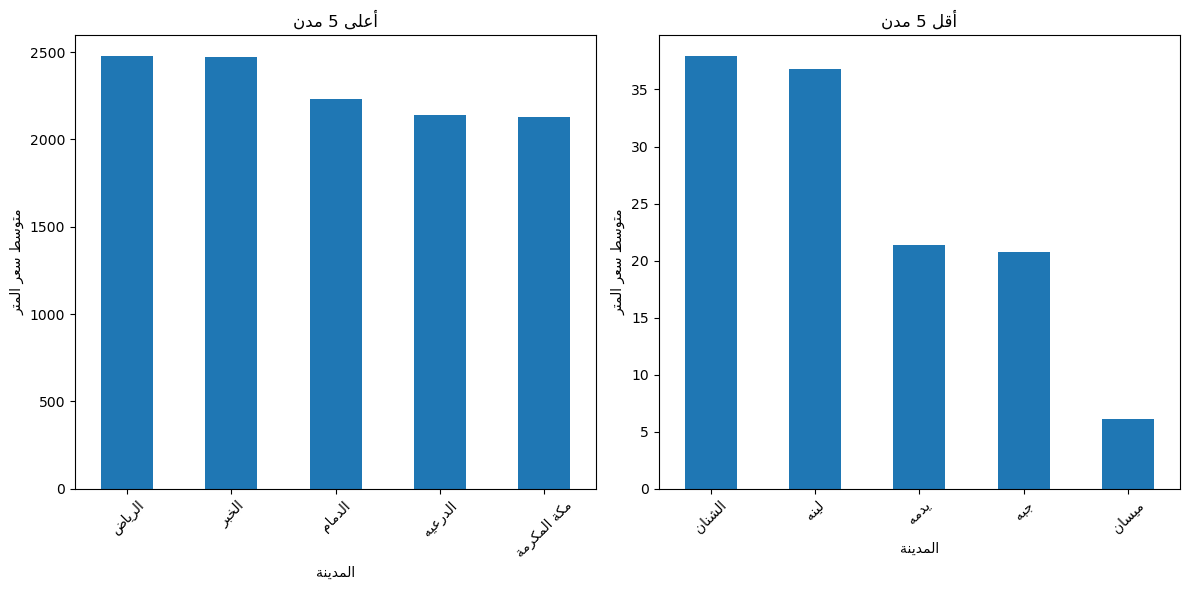

In [17]:
# Apply the function f to the 'المدينة' column for both DataFrames
mydata_top_5_avg_pieceland['المدينة'] = mydata_top_5_avg_pieceland['المدينة'].apply(f)
mydata_bottom_5_avg_pieceland['المدينة'] = mydata_bottom_5_avg_pieceland['المدينة'].apply(f)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Top 5 Cities Plot
mydata_top_5_avg_pieceland.plot.bar(x='المدينة', y='متوسط سعر المتر المربع', legend=False, ax=axes[0])
axes[0].set_ylabel(f('متوسط سعر المتر'))
axes[0].set_xlabel(f('المدينة'))
axes[0].set_title(f('أعلى 5 مدن'))
axes[0].tick_params(axis='x', rotation=45)

# Bottom 5 Cities Plot
mydata_bottom_5_avg_pieceland.plot.bar(x='المدينة', y='متوسط سعر المتر المربع', legend=False, ax=axes[1])
axes[1].set_ylabel(f('متوسط سعر المتر'))
axes[1].set_xlabel(f('المدينة'))
axes[1].set_title(f('أقل 5 مدن'))
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

##### In this graph we see the top 5 cities where the average price per meter in Al-Khobar is very close to Riyadh.

##### In this graph we see the bottom 5 cities where the average price per meter in Maysan is the lowest value in cities in Saudi.

### Create the table for the prices of pieces of land per meter in each city.

In [18]:
# Group by 'المدينة' and collect 'سعر المتر المربع' values into lists
group_pieceland = pieceland.groupby('المدينة')['سعر المتر المربع'].apply(list)

# Find the longest list to determine the number of rows needed
length_group_pieceland = max(group_pieceland.apply(len))

# Create a new DataFrame with each city as a column
# Pad shorter lists with None
pivot_pieceland = {المدينة: values + [None] * (length_group_pieceland- len(values)) for المدينة, values in group_pieceland.items()}
# This table for prices m2 for each city.
prices_m2_city = pd.DataFrame(pivot_pieceland)

# To delete column 0
prices_m2_city.index = range(1, len(prices_m2_city) + 1)
 
prices_m2_city.round(2)

,أضم,ابقيق,ابها,ابو عريش,احد المسارحه,احد رفيده,الافلاج,الباحه,البجاديه,البدائع,...,لينه,محايل عسير,مرات,مكة المكرمة,ميسان,نجران,نصاب,وادي الدواسر,وادي الفرع,يدمه
1,111.18,59.22,415.31,117.19,80.65,923.08,50.79,16.61,112.50,66.67,...,32.86,171.92,135.59,289.02,4.65,100.22,86.67,200.00,78.23,25.00
2,141.67,175.00,530.30,156.25,221.61,285.71,86.96,417.41,20.00,85.11,...,50.00,13.61,144.00,7607.50,6.17,11.36,14.61,1077.98,70.36,16.67
3,66.62,75.85,837.36,468.75,16.60,200.00,30.30,803.57,25.00,74.18,...,27.55,31.75,142.86,5893.56,7.53,114.55,160.41,209.20,63.87,8.33
4,65.22,33.33,565.92,267.97,106.78,147.06,75.76,63.49,25.00,964.91,...,NaN,126.58,217.74,4173.91,NaN,2542.37,15.15,229.98,76.61,25.00
5,72.46,500.00,1066.67,157.36,560.42,535.82,83.33,160.40,22.73,108.33,...,NaN,83.33,176.00,1093.96,NaN,146.50,13.23,244.15,73.60,63.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### We set the all cities in columns and set the prices of pieces of land per meter in rows.

### Delete abnormal points

In [19]:
def outlier_bounds(column, multiplier=2.0):  # Increased multiplier
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return lower_bound, upper_bound

for column in prices_m2_city.columns:
    lower_bound, upper_bound = outlier_bounds(prices_m2_city[column])
    median_value = prices_m2_city[column].median()
    prices_m2_city[column] = prices_m2_city[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
    
    # List of columns to check for outliers
columns_to_check = [real_estate_Q1['المدينة'].unique()]  # specify the relevant columns

for column in columns_to_check:
    lower_bound, upper_bound = outlier_bounds(prices_m2_city[column])
    # Prices boundary per m2 for each city.
    prices_boundary_m2 = prices_m2_city[(prices_m2_city[column] >= lower_bound) & (prices_m2_city[column] <= upper_bound)]
    
prices_boundary_m2.index = range(1, len(prices_boundary_m2) + 1)

prices_boundary_m2

,أضم,ابقيق,ابها,ابو عريش,احد المسارحه,احد رفيده,الافلاج,الباحه,البجاديه,البدائع,...,لينه,محايل عسير,مرات,مكة المكرمة,ميسان,نجران,نصاب,وادي الدواسر,وادي الفرع,يدمه
1,111.1836,59.2153,415.3094,117.1875,80.64510,923.0769,50.7936,16.6112,25.0000,66.6666,...,32.8571,171.9197,135.5932,289.0173,4.6457,100.2227,NaN,200.0000,78.2312,25.0000
2,NaN,175.0000,530.3030,156.2500,221.60660,285.7142,86.9565,417.4120,20.0000,85.1063,...,50.0000,13.6054,144.0000,1216.2162,6.1728,11.3636,14.6100,200.0000,70.3614,16.6666
3,66.6199,75.8533,837.3590,468.7500,16.60270,200.0000,30.3030,803.5714,25.0000,74.1839,...,27.5482,31.7460,142.8571,1216.2162,7.5295,114.5475,21.6450,209.2050,63.8667,8.3333
4,65.2173,33.3333,565.9163,267.9687,106.78050,147.0588,75.7575,63.4920,25.0000,118.5185,...,NaN,126.5822,217.7419,4173.9130,NaN,128.9517,15.1515,229.9802,76.6073,25.0000
5,72.4637,500.0000,1066.6666,157.3564,54.01545,535.8195,83.3333,160.4015,22.7272,108.3333,...,NaN,83.3333,176.0000,1093.9642,NaN,146.4986,13.2275,244.1525,73.6002,63.3333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### We wrote an equation to eliminate the anomalous points to give better results.

### Print some statistical analyses

In [20]:
prices_boundary_m2.describe().round(2)

,أضم,ابقيق,ابها,ابو عريش,احد المسارحه,احد رفيده,الافلاج,الباحه,البجاديه,البدائع,...,لينه,محايل عسير,مرات,مكة المكرمة,ميسان,نجران,نصاب,وادي الدواسر,وادي الفرع,يدمه
count,14.00,126.00,327.00,228.00,10.00,56.00,119.00,71.00,29.00,125.00,...,3.00,224.00,39.00,854.00,3.00,379.00,10.00,51.00,137.00,88.00
mean,62.99,271.40,805.28,322.74,66.38,480.33,69.29,241.97,23.36,131.52,...,36.80,146.86,166.40,1352.01,6.12,121.04,21.93,186.13,70.23,17.35
std,29.98,163.79,597.80,219.64,66.80,355.84,29.72,199.06,2.32,71.69,...,11.73,107.19,47.60,986.92,1.44,73.13,10.89,123.12,21.72,14.55
min,10.77,25.32,2.25,2.50,8.15,16.81,11.11,13.04,16.00,6.87,...,27.55,3.47,57.97,17.55,4.65,8.43,13.23,10.00,11.36,4.55
25%,50.18,125.00,287.53,154.49,17.80,198.78,47.81,94.70,21.74,85.71,...,30.20,68.05,147.76,598.91,5.41,65.71,14.52,75.71,55.77,6.25
50%,65.92,263.80,813.01,281.96,40.70,423.24,75.00,205.56,25.00,114.68,...,32.86,122.37,166.67,1187.73,6.17,125.00,18.40,200.00,70.36,12.50
75%,74.35,400.00,1149.43,508.99,100.25,719.94,86.96,354.17,25.00,162.50,...,41.43,190.70,200.48,1699.68,6.85,148.15,25.25,240.00,84.26,26.67
max,113.63,680.27,2888.89,880.00,221.61,1428.57,160.00,833.33,25.00,346.15,...,50.00,487.75,254.45,4333.33,7.53,317.46,48.61,505.69,128.74,63.33


In [21]:
prices_boundary_m2_df = pd.DataFrame(prices_boundary_m2)

# Find columns with count <= 50
columns_to_delete = prices_boundary_m2_df.columns[prices_boundary_m2_df.count() <= 50]

# Drop the columns
prices_boundary_m2_df.drop(columns=columns_to_delete, inplace=True)

#find Top 5 cities

cities_prices_m2 = [{
    "cities": c,
    "avr": prices_boundary_m2_df[c].mean(),
    "max": prices_boundary_m2_df[c].max(),
    "min": prices_boundary_m2_df[c].min(),
    "std": prices_boundary_m2_df[c].std(),
    "25%": prices_boundary_m2_df[c].quantile(0.25),
    "50%": prices_boundary_m2_df[c].quantile(0.50),
    "75%": prices_boundary_m2_df[c].quantile(0.75)
} for c in prices_boundary_m2_df.columns]

top_5_cities_prices_m2 = sorted(cities_prices_m2 , key=lambda x: x['avr'], reverse=True)[:5]
bottom_5_cities_prices_m2 = sorted(cities_prices_m2, key=lambda x: x['avr'])[:5]

top_5_cities_prices_m2_df = pd.DataFrame(top_5_cities_prices_m2)
bottom_5_cities_prices_m2_df = pd.DataFrame(bottom_5_cities_prices_m2)

##### We need this function when we want to draw the plot box.

### This is the graph after deleting the anomalous points

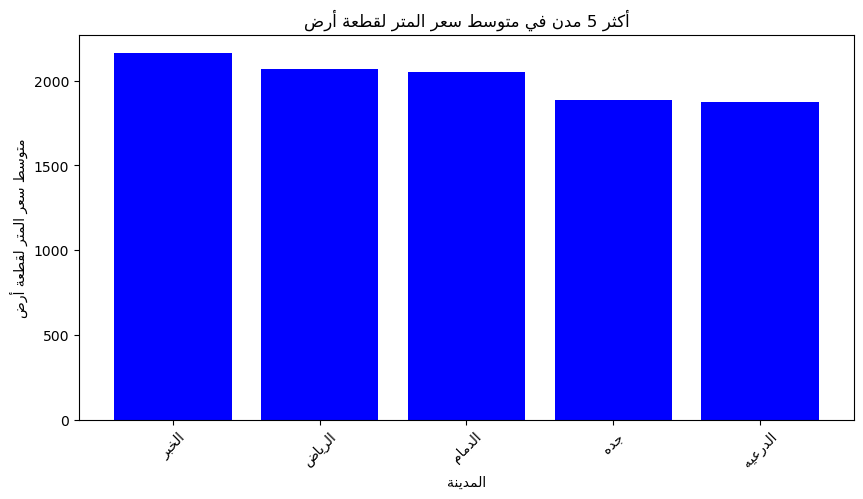

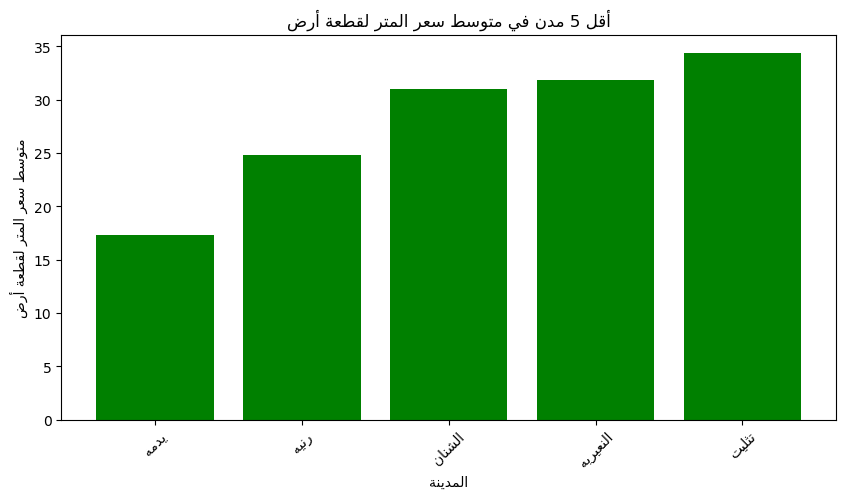

In [22]:
top_5_cities_prices_m2_df['cities'] = top_5_cities_prices_m2_df['cities'].apply(f)
bottom_5_cities_prices_m2_df['cities'] = bottom_5_cities_prices_m2_df['cities'].apply(f)

plt.figure(figsize=(10, 5))
plt.bar(top_5_cities_prices_m2_df['cities'], top_5_cities_prices_m2_df['avr'], color='blue')
plt.xlabel(f('المدينة'))
plt.ylabel(f('متوسط سعر المتر لقطعة أرض'))
plt.title(f('أكثر 5 مدن في متوسط سعر المتر لقطعة أرض'))
plt.xticks(rotation=45)
plt.show()

# Plotting Bottom 5 Cities
plt.figure(figsize=(10, 5))
plt.bar(bottom_5_cities_prices_m2_df['cities'], bottom_5_cities_prices_m2_df['avr'], color='green')
plt.xlabel(f('المدينة'))
plt.ylabel(f('متوسط سعر المتر لقطعة أرض'))
plt.title(f('أقل 5 مدن في متوسط سعر المتر لقطعة أرض'))
plt.xticks(rotation=45)
plt.show()

##### In this graph we see the top 5 cities after removing outliers where we can see the average price per meter in Al-Khobar has become more than in Riyadh.

##### In this graph we see the bottom 5 cities after removing outliers where still the average price per meter in Maysan is the lowest value in cities in Saudi.

### This is the top 5 cities in the box plot

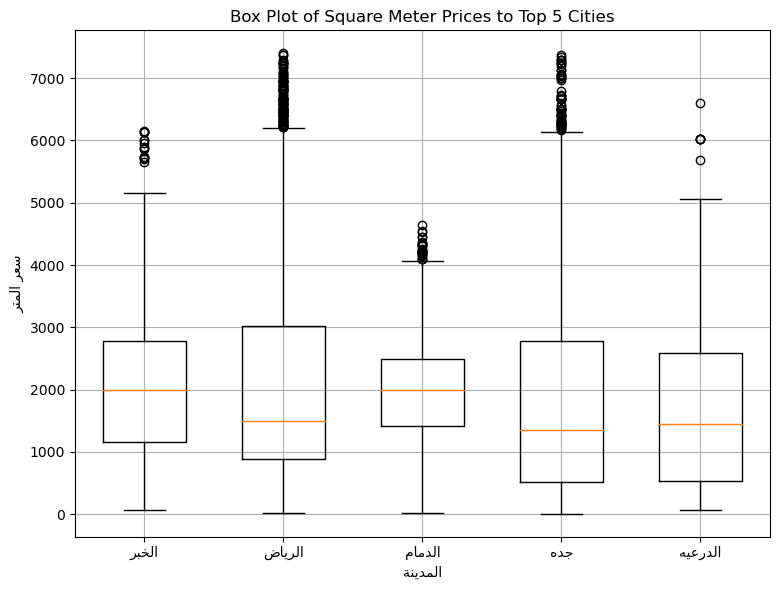

In [23]:
# Calculate the average price per square meter for each city and sort
avg_price_per_city = prices_boundary_m2_df.mean().sort_values(ascending=False)

# Get the top 5 cities
top_5_cities = avg_price_per_city.head(5).index

plt.figure(figsize=(15, 6))

# Subplot 1: Box plots for the top 5 cities
plt.subplot(1, 2, 1)
for i, city in enumerate(top_5_cities):
    plt.boxplot(prices_boundary_m2_df[city].dropna(), positions=[i], widths=0.6)
    
# Apply the function f to each city name for the x-tick labels
plt.xticks(range(len(top_5_cities)), [f(city) for city in top_5_cities])

plt.title('Box Plot of Square Meter Prices to Top 5 Cities')
plt.xlabel(f('المدينة'))
plt.ylabel(f('سعر المتر'))
plt.grid(True)

plt.tight_layout()
plt.show()

##### The benefit of this graph we can see the maximum, minimum, and average for each city.

# Analysis of real estate in Riyadh neighborhoods

### I chose to measure the neighborhoods of Riyadh Because Riyadh has done the largest number of real estate deals.

In [24]:
plot_land_riyadh = real_estate_Q1[(real_estate_Q1['تصنيف العقار'] == 'سكني') & (real_estate_Q1['نوع العقار'] == 'قطعة أرض')& (real_estate_Q1['المدينة'] == 'الرياض')]

In [25]:
avg_price_plot_land_riyadh = plot_land_riyadh.groupby('الحي')['سعر المتر المربع'].mean()

top_5_avg_price_plot_land_riyadh = avg_price_plot_land_riyadh.sort_values(ascending=False).head(5)
bottom_5_avg_price_plot_land_riyadh = avg_price_plot_land_riyadh.sort_values(ascending=True).head(5)

top_5_avg_price_plot_land_riyadh_df = top_5_avg_price_plot_land_riyadh.reset_index()
top_5_avg_price_plot_land_riyadh_df.columns = ['الحي', 'متوسط سعر المتر المربع']

bottom_5_avg_price_plot_land_riyadh_df = bottom_5_avg_price_plot_land_riyadh.reset_index()
bottom_5_avg_price_plot_land_riyadh_df.columns = ['الحي', 'متوسط سعر المتر المربع']

In [26]:
mydata_top_5_avg_price_plot_land_riyadh = top_5_avg_price_plot_land_riyadh_df.sort_values(by='متوسط سعر المتر المربع', ascending=False)

mydata_top_5_avg_price_plot_land_riyadh.round(2)

,الحي,متوسط سعر المتر المربع
0,حي/البطحاء,30128.74
1,حي/النخيل,12533.51
2,حي/حطين,8973.31
3,حي/الملقا,8848.51
4,حي/المغرزات,8815.73


In [27]:
mydata_bottom_5_avg_price_plot_land_riyadh= bottom_5_avg_price_plot_land_riyadh_df.sort_values(by='متوسط سعر المتر المربع', ascending=False)

mydata_bottom_5_avg_price_plot_land_riyadh.round(2)

,الحي,متوسط سعر المتر المربع
4,حي/الراية,322.22
3,حي/الرسالة,275.00
2,حي/الحائر,272.32
1,حي/الغروب,216.90
0,حي/هيت,133.33


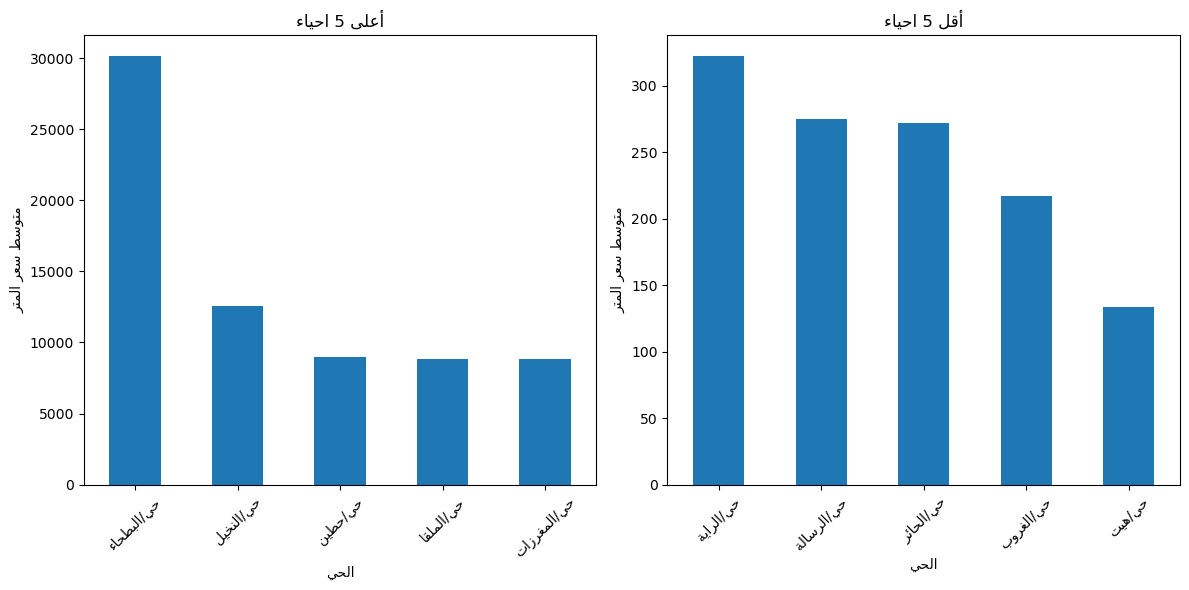

In [28]:
# Apply the function f to the 'المدينة' column for both DataFrames
mydata_top_5_avg_price_plot_land_riyadh['الحي'] = mydata_top_5_avg_price_plot_land_riyadh['الحي'].apply(f)
mydata_bottom_5_avg_price_plot_land_riyadh['الحي'] = mydata_bottom_5_avg_price_plot_land_riyadh['الحي'].apply(f)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Top 5 Cities Plot
mydata_top_5_avg_price_plot_land_riyadh.plot.bar(x='الحي', y='متوسط سعر المتر المربع', legend=False, ax=axes[0])
axes[0].set_ylabel(f('متوسط سعر المتر'))
axes[0].set_xlabel(f('الحي'))
axes[0].set_title(f('أعلى 5 احياء'))
axes[0].tick_params(axis='x', rotation=45)

# Bottom 5 Cities Plot
mydata_bottom_5_avg_price_plot_land_riyadh.plot.bar(x='الحي', y='متوسط سعر المتر المربع', legend=False, ax=axes[1])
axes[1].set_ylabel(f('متوسط سعر المتر'))
axes[1].set_xlabel(f('الحي'))
axes[1].set_title(f('أقل 5 احياء'))
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [29]:
# Group by 'المدينة' and collect 'سعر المتر المربع' values into lists
group_plot_land_riyadh = plot_land_riyadh.groupby('الحي')['سعر المتر المربع'].apply(list)

# Find the longest list to determine the number of rows needed
length_group_plot_land_riyadh = max(group_plot_land_riyadh.apply(len))

# Create a new DataFrame with each city as a column
# Pad shorter lists with None
pivot_plot_land_riyadh = {المدينة: values + [None] * (length_group_plot_land_riyadh- len(values)) for المدينة, values in group_plot_land_riyadh.items()}
# This table for prices m2 for each city.
prices_m2_neighborhood = pd.DataFrame(pivot_plot_land_riyadh)

In [30]:
# To delete column 0
prices_m2_neighborhood.index = range(1, len(prices_m2_neighborhood) + 1)
 
prices_m2_neighborhood.round(2)

,حي/أحد,حي/أخرى,حي/اسكان الجزيره,حي/اشبيليا,حي/الازدهار,حي/الامانة,حي/الاندلس,حي/البديعة,حي/البرية,حي/البطحاء,...,حي/عريض,حي/عكاظ,حي/عليشة,حي/غبيراء,حي/غرناطة,حي/قرطبة,حي/لبن,حي/منفوحة,حي/نمار,حي/هيت
1,1142.86,1148.39,2892.56,2555.56,7211.54,1202.06,6083.65,6153.85,698.41,30128.74,...,937.50,2998.67,2545.95,536.91,4357.30,4500.00,2222.22,1010.10,1198.48,133.33
2,2164.50,1191.36,NaN,302.48,6884.21,4000.00,2888.89,760.46,110.50,NaN,...,955.41,1450.00,1569.69,3153.85,1363.64,1325.52,3100.00,1983.05,1006.91,NaN
3,1280.00,1191.36,NaN,2410.46,4640.00,1377.34,4644.44,955.06,714.29,NaN,...,883.28,3076.92,2068.97,1098.90,4000.00,2471.99,1500.00,1904.76,1850.00,NaN
4,2737.48,1167.23,NaN,832.92,3623.19,3650.00,870.00,4500.00,579.71,NaN,...,777.78,1430.00,2355.71,1860.93,4906.67,4218.90,4000.00,4091.17,852.53,NaN
5,250.00,1151.43,NaN,833.54,4800.00,2500.00,3500.00,1826.67,666.67,NaN,...,722.22,1430.00,4778.74,1650.00,3887.50,6026.79,3548.54,2166.67,946.67,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
def outlier_bounds(column, multiplier=2.0):  # Increased multiplier
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return lower_bound, upper_bound

for column in prices_m2_neighborhood.columns:
    lower_bound, upper_bound = outlier_bounds(prices_m2_neighborhood[column])
    median_value = prices_m2_neighborhood[column].median()
    prices_m2_neighborhood[column] = prices_m2_neighborhood[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
    
    # List of columns to check for outliers
columns_to_check = [plot_land_riyadh['الحي'].unique()]  # specify the relevant columns

for column in columns_to_check:
    lower_bound, upper_bound = outlier_bounds(prices_m2_neighborhood[column])
    # Prices boundary per m2 for each neighborhood.
    prices_boundary_neighborhood = prices_m2_neighborhood[(prices_m2_neighborhood[column] >= lower_bound) & (prices_m2_neighborhood[column] <= upper_bound)]

prices_boundary_neighborhood.index = range(1, len(prices_boundary_neighborhood) + 1)

prices_boundary_neighborhood

,حي/أحد,حي/أخرى,حي/اسكان الجزيره,حي/اشبيليا,حي/الازدهار,حي/الامانة,حي/الاندلس,حي/البديعة,حي/البرية,حي/البطحاء,...,حي/عريض,حي/عكاظ,حي/عليشة,حي/غبيراء,حي/غرناطة,حي/قرطبة,حي/لبن,حي/منفوحة,حي/نمار,حي/هيت
1,1142.8571,1148.3928,2892.5619,2555.5555,7211.5384,1202.0576,6083.6501,1787.7551,698.4126,30128.7411,...,937.5000,1400.0,2545.9459,536.9127,4357.2984,4500.0000,2222.2222,1010.1010,1198.4773,133.3333
2,2164.5021,1191.3570,NaN,302.4822,6884.2076,4000.0000,2888.8888,760.4562,666.6666,NaN,...,955.4140,1450.0,1569.6862,3153.8461,1363.6363,1325.5225,3100.0000,1983.0508,1006.9144,NaN
3,1280.0000,1191.3570,NaN,2410.4622,4640.0000,1377.3416,4644.4444,955.0561,714.2857,NaN,...,883.2807,1400.0,2068.9655,1098.9010,4000.0000,2471.9866,1500.0000,1904.7619,NaN,NaN
4,2737.4816,1167.2319,NaN,832.9160,3623.1884,3650.0000,870.0000,1787.7551,NaN,NaN,...,777.7777,1430.0,2355.7126,1860.9295,4906.6666,4218.9021,4000.0000,4091.1747,852.5345,NaN
5,250.0000,1151.4283,NaN,833.5408,4800.0000,2500.0000,3500.0000,1826.6666,666.6666,NaN,...,722.2222,1430.0,4778.7441,1650.0000,3887.5000,6026.7857,3548.5360,2166.6666,946.6666,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
prices_boundary_neighborhood.describe().round(2)

,حي/أحد,حي/أخرى,حي/اسكان الجزيره,حي/اشبيليا,حي/الازدهار,حي/الامانة,حي/الاندلس,حي/البديعة,حي/البرية,حي/البطحاء,...,حي/عريض,حي/عكاظ,حي/عليشة,حي/غبيراء,حي/غرناطة,حي/قرطبة,حي/لبن,حي/منفوحة,حي/نمار,حي/هيت
count,9.00,9.00,1.00,55.00,10.00,5.00,24.00,39.00,4.00,1.00,...,388.00,78.00,7.00,14.00,7.00,45.00,72.00,63.00,329.00,1.00
mean,1502.38,1162.31,2892.56,2783.35,6296.27,2545.88,3352.05,1665.07,686.51,30128.74,...,698.74,1332.88,2909.60,1730.70,3564.51,4311.09,2924.94,2160.04,861.99,133.33
std,729.65,24.65,NaN,1347.55,2582.67,1275.44,1785.13,511.75,23.81,NaN,...,130.37,162.77,1103.79,705.00,1163.48,1893.03,1235.62,1225.48,242.66,NaN
min,250.00,1113.74,2892.56,266.67,3623.19,1202.06,866.67,382.28,666.67,30128.74,...,281.69,1000.00,1569.69,536.91,1363.64,1325.52,500.00,79.18,218.28,133.33
25%,1142.86,1150.19,2892.56,2018.00,4660.00,1377.34,1816.73,1427.66,666.67,30128.74,...,611.11,1300.00,2212.34,1316.22,3218.22,3089.63,1951.84,1100.00,742.24,133.33
50%,1280.00,1167.23,2892.56,2716.65,5486.42,2500.00,3151.77,1787.76,682.54,30128.74,...,700.00,1400.00,2545.95,1707.35,3887.50,4253.33,3000.00,2103.85,925.18,133.33
75%,2001.60,1179.87,2892.56,3686.90,7129.71,3650.00,4659.52,1882.33,702.38,30128.74,...,777.78,1450.00,3524.09,2096.89,4178.65,5333.33,3757.96,3003.04,982.91,133.33
max,2737.48,1191.36,2892.56,5952.38,11544.01,4000.00,6677.02,2750.00,714.29,30128.74,...,1072.55,1611.11,4778.74,3153.85,4906.67,9615.38,6250.00,5891.99,1518.04,133.33


In [33]:
prices_boundary_neighborhood_df = pd.DataFrame(prices_boundary_neighborhood)

# Find columns with count <= 50
columns_to_delete = prices_boundary_neighborhood_df.columns[prices_boundary_neighborhood_df.count() <= 50]

# Drop the columns
prices_boundary_neighborhood_df.drop(columns=columns_to_delete, inplace=True)

# Find Top 5 and Bottom 5 neighborhoods after filtering columns
neighborhood_prices_m2 = [{
    "neighborhood": c,
    "avr": prices_boundary_neighborhood_df[c].mean(),
    "max": prices_boundary_neighborhood_df[c].max(),
    "min": prices_boundary_neighborhood_df[c].min(),
    "std": prices_boundary_neighborhood_df[c].std(),
    "25%": prices_boundary_neighborhood_df[c].quantile(0.25),
    "50%": prices_boundary_neighborhood_df[c].quantile(0.50),
    "75%": prices_boundary_neighborhood_df[c].quantile(0.75)
} for c in prices_boundary_neighborhood_df.columns]

top_5_neighborhood_prices_m2 = sorted(neighborhood_prices_m2, key=lambda x: x['avr'], reverse=True)[:5]
bottom_5_neighborhood_prices_m2 = sorted(neighborhood_prices_m2, key=lambda x: x['avr'])[:5]

top_5_neighborhood_prices_m2_df = pd.DataFrame(top_5_neighborhood_prices_m2)
bottom_5_neighborhood_prices_m2_df = pd.DataFrame(bottom_5_neighborhood_prices_m2)


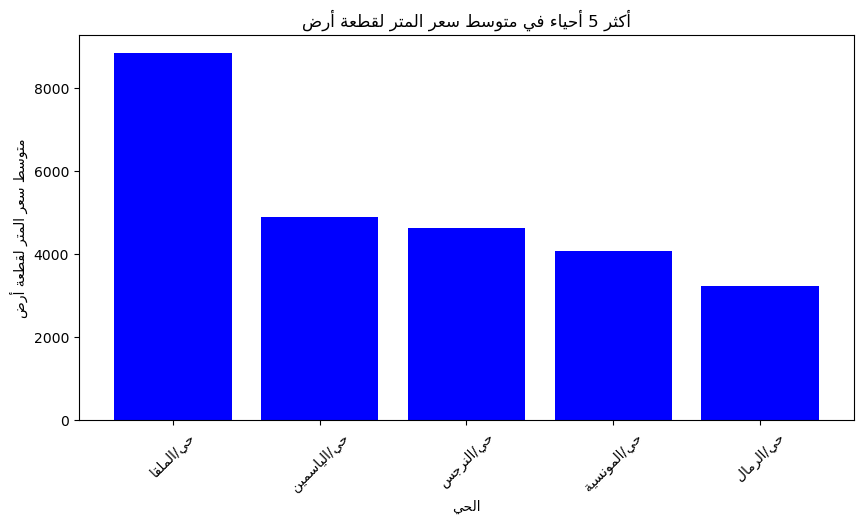

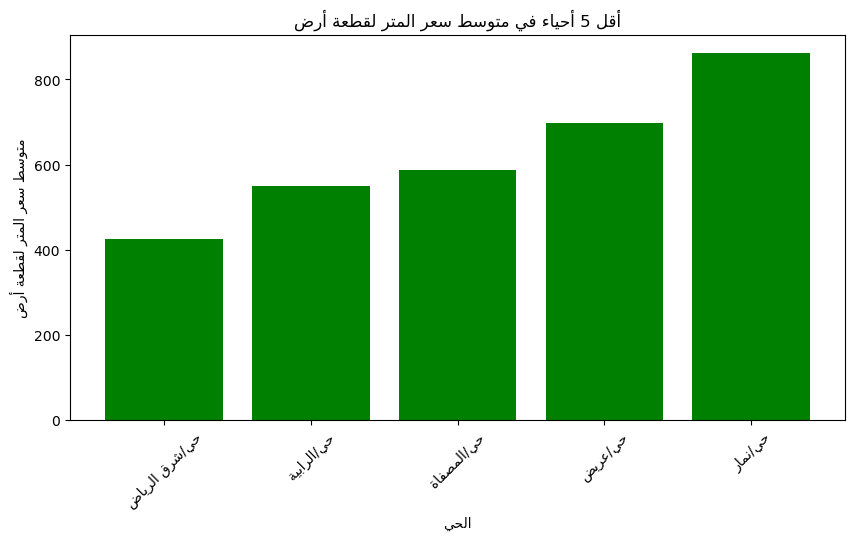

In [34]:
top_5_neighborhood_prices_m2_df['neighborhood'] = top_5_neighborhood_prices_m2_df['neighborhood'].apply(f)
bottom_5_neighborhood_prices_m2_df['neighborhood'] = bottom_5_neighborhood_prices_m2_df['neighborhood'].apply(f)

plt.figure(figsize=(10, 5))
plt.bar(top_5_neighborhood_prices_m2_df['neighborhood'], top_5_neighborhood_prices_m2_df['avr'], color='blue')
plt.xlabel(f('الحي'))
plt.ylabel(f('متوسط سعر المتر لقطعة أرض'))
plt.title(f('أكثر 5 أحياء في متوسط سعر المتر لقطعة أرض'))
plt.xticks(rotation=45)
plt.show()

# Plotting Bottom 5 Cities
plt.figure(figsize=(10, 5))
plt.bar(bottom_5_neighborhood_prices_m2_df['neighborhood'], bottom_5_neighborhood_prices_m2_df['avr'], color='green')
plt.xlabel(f('الحي'))
plt.ylabel(f('متوسط سعر المتر لقطعة أرض'))
plt.title(f('أقل 5 أحياء في متوسط سعر المتر لقطعة أرض'))
plt.xticks(rotation=45)
plt.show()